# random growth model

In [ ]:
import os
import numpy as np
import cpnet
import networkx as nx
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.colors import ListedColormap
import functions as fct
import parameters as par
import emp_metrics as em
from tqdm import tqdm
import numpy as np
import powerlaw
import os


# Teted conditions
T = int(1e5)
nb_banks = int(1e6)
init_money_min = 1e-2

fig, ax = plt.subplots(figsize=(3,3))
index = np.logspace(-6.5,-4)



colors = sns.color_palette("flare", n_colors=len(range(0,T,500)))

path = "data_1m_banks_vol_10_g_10percent_year/"

os.makedirs("./results/power_law/charts_1m_banks_vol_10_g_10percent_year/",exist_ok=True)

for i, t in enumerate(tqdm(range(0,T,500))):
        try:
            df_ccdf = pd.read_csv(f"./results/power_law/{path}{t}_df_ccdf.csv")
        except:
            pass
        
        plt.plot(df_ccdf["data"],df_ccdf["rank"],".",color=colors[i], markersize=1, label='_nolegend_')
        plt.yscale("log")
        plt.xscale("log")
        plt.ylabel(r"$\mathbb{P}(Y > y)$")
        plt.xlabel(r"$y$")
        # plt.savefig(f"./results/power_law/charts_100000_banks_vol_10_g_10percent_year/{t}_stationarity_random_growth.png", bbox_inches="tight")
        
        
ref= 1e-15
plt.plot(index, [ref/x**0.5 for x in index], "--",color="0",)
plt.plot(index, [ref/x**1 for x in index], "--",color="0.15")
plt.plot(index, [ref/x**1.5 for x in index], "--",color="0.30")
plt.plot(index, [ref/x**2 for x in index], "--",color="0.45")
plt.plot(index, [ref/x**2.5 for x in index], "--",color="0.60")
plt.plot(index, [ref/x**3 for x in index], "--",color="0.75")
plt.legend([r"$x^{-0.5}$",r"$x^{-1}$",r"$x^{-1.5}$",r"$x^{-2}$",r"$x^{-2.5}$",r"$x^{-3}$"], 
           loc="lower center",
        # bbox_to_anchor=(1.0, 1.0),
        ncols=3
           )

plt.savefig(f"./results/article_plots/stationarity_random_growth_1m_banks_vol_10_g_10_2.png", bbox_inches="tight")

# empirical in-out degree

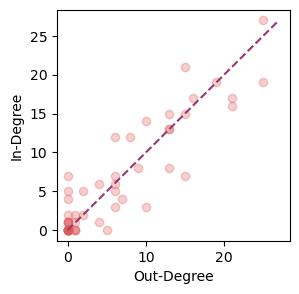

In [24]:
import numpy as np
import matplotlib.pyplot as plt

path = "./results/empirical_results/frankfurt_june_light/secured/data/"

# step = 39999
adj = np.array(pd.read_csv(f"{path}exposure_view/adj_matrices/50/arr_binary_adj_on_day_2022-12-30.csv",index_col=0,))

colors = sns.color_palette("flare", n_colors=2)

fig, ax = plt.subplots(figsize=par.small_figsize)

# Assuming adj_matrix is your adjacency matrix as a numpy array
adj_matrix = adj

# Calculate out-degrees (sum of columns along the axis 1) and in-degrees (sum of rows along the axis 0)
out_degrees = np.sum(adj_matrix, axis=1)
in_degrees = np.sum(adj_matrix, axis=0)

# Create a scatter plot
plt.scatter(out_degrees, in_degrees, alpha=0.3, color=colors[0])

max_degree = max(max(out_degrees), max(in_degrees))  # Find max degree to limit the line
plt.plot([0, max_degree], [0, max_degree], '--', label='y = x', color=colors[1])

# Add labels and title to the plot
plt.xlabel('Out-Degree')
plt.ylabel('In-Degree')
# plt.ylim(0,70)
# plt.xlim(0,70)
# plt.yscale("log")
# plt.xscale("log")

plt.savefig(f"./results/article_plots/in_out_degree_scatter_empirical.pdf", bbox_inches="tight")

# Show the plot
plt.show()

# single run

In [1]:
import os
import numpy as np
import cpnet
import networkx as nx
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.colors import ListedColormap
import functions as fct
import parameters as par
import emp_metrics as em
from tqdm import tqdm
import numpy as np
import powerlaw
import os
import graphics as gx



# build dic array binary ajency


## cp net plot on a single day

In [2]:
path = "./results/single_run/best_run_vf/"

step = 5000
adj = np.array(pd.read_csv(f"{path}exposure_view/adj_matrices/50/arr_binary_adj_on_day_{step}.csv",index_col=0,))

# build nx object
bank_network = nx.from_numpy_array(
    adj,
    parallel_edges=False,
    create_using=nx.DiGraph,
)

sig_c, sig_x, significant, pvalues = em.step_cpnet(
            bank_network, algo="Lip"
        )




100%|██████████| 100/100 [00:00<00:00, 470.66it/s]


In [20]:
pvalues

[8.104705795375367e-11]

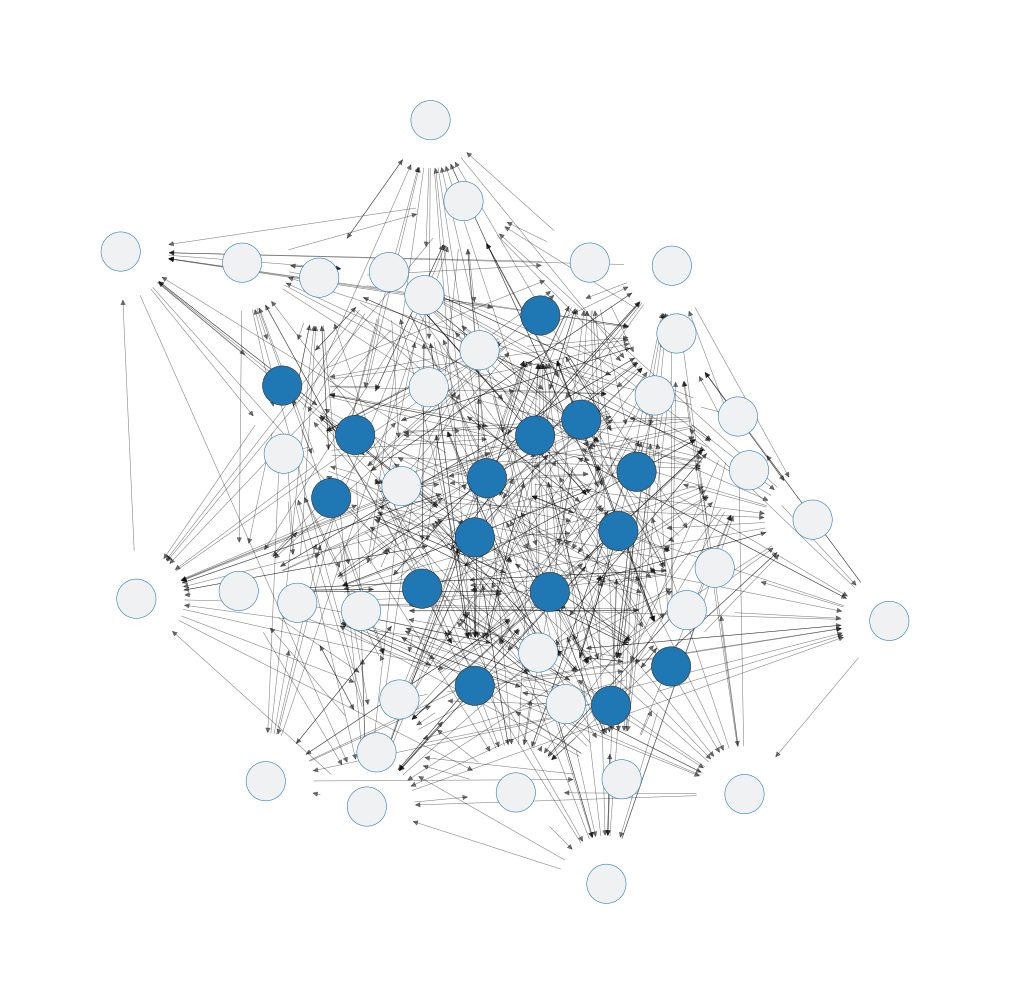

In [39]:
# plot cp structure
fig, ax = plt.subplots(figsize=(3,3), dpi=400)
output = cpnet.draw(bank_network, sig_c, sig_x, ax, draw_nodes_kwd ={"node_size":50,"linewidths":0.1}, draw_edges_kwd = {"alpha":0.5, "width":0.1, "arrowsize":2})

plt.savefig(f"./results/article_plots/example_core_periphery.pdf", bbox_inches="tight")

## in and out degree

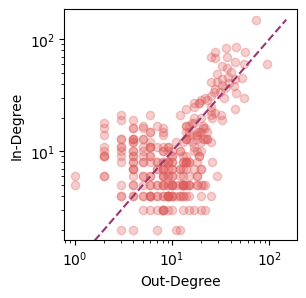

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# path = "./results/single_run/best_run_vf/"
path = "./results/single_run/init_from_zero_relative_log_normal_300_banks/"
# path = "./results/single_run/rgm_300_completed/"

# step = 39999
step = 9999
adj = np.array(pd.read_csv(f"{path}exposure_view/adj_matrices/50/arr_binary_adj_on_day_{step}.csv",index_col=0,))

colors = sns.color_palette("flare", n_colors=2)

fig, ax = plt.subplots(figsize=par.small_figsize)

# Assuming adj_matrix is your adjacency matrix as a numpy array
adj_matrix = adj

# Calculate out-degrees (sum of columns along the axis 1) and in-degrees (sum of rows along the axis 0)
out_degrees = np.sum(adj_matrix, axis=1)
in_degrees = np.sum(adj_matrix, axis=0)

# Create a scatter plot
plt.scatter(out_degrees, in_degrees, alpha=0.3, color=colors[0])

max_degree = max(max(out_degrees), max(in_degrees))  # Find max degree to limit the line
plt.plot([0, max_degree], [0, max_degree], '--', label='y = x', color=colors[1])

# Add labels and title to the plot
plt.xlabel('Out-Degree')
plt.ylabel('In-Degree')
# plt.ylim(0,70)
# plt.xlim(0,70)
plt.yscale("log")
plt.xscale("log")

plt.savefig(f"./results/article_plots/in_out_degree_scatter.pdf", bbox_inches="tight")

# Show the plot
plt.show()

## plot trajectory

In [2]:
import os
import numpy as np
import cpnet
import networkx as nx
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.colors import ListedColormap
import functions as fct
import parameters as par
import emp_metrics as em
from tqdm import tqdm
import numpy as np
import powerlaw
import os
import graphics as gx


### cpnet pvalues

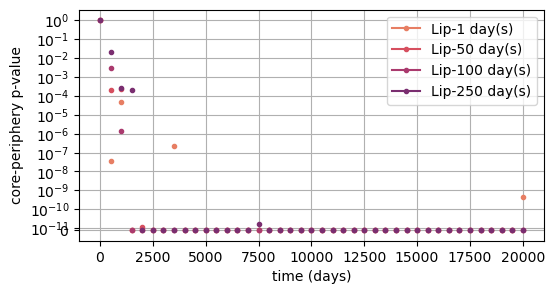

In [4]:
path = "./results/single_run/best_run_2/"
# path = "./results/single_run/rgm_300_completed/"
df_network_trajectory = pd.read_csv(f"{path}df_network_trajectory.csv",index_col=0)

# if necessary, direct re-plot
df = df_network_trajectory
index = "exposure_view/core-periphery/cpnet_pvalue-Lip"
cols=[f"{item}{par.df_figures.loc[index,'extension']}"
                for item in par.df_figures.loc[index, "items"]
            ]

# drop the last col to avoir the weighted network
cols = cols[:-1]
path_results = path
file_name=f"{path_results}{index}.pdf"
fig, ax = plt.subplots(figsize=par.large_figsize)
colors = sns.color_palette("flare", n_colors=len(cols))

# convert the cols of the df using the convertion of first col
df = gx.convert_data(df[cols], par.df_plt.loc[cols[0], "convertion"])

for i, col in enumerate(cols):
    try:
        plt.plot(
            df.index,
            df[col],
            par.df_plt.loc[col, "style"],
            color=colors[i],
        )

    except:
        print(f"bug for {col}")

plt.legend(
    par.df_plt.loc[cols, "legend"],
    # loc="upper left",
    # bbox_to_anchor=(0.25, 0.95),
)
plt.xlabel("time (days)")
plt.ylabel(par.df_plt.loc[cols[0], "label"])
plt.yscale(par.df_plt.loc[cols[0], "scale"],linthresh=1e-10)
plt.grid()
plt.savefig(f"{file_name}.pdf", bbox_inches="tight")
os.makedirs(f"./results/article_plots/exposure_view/core-periphery/",exist_ok=True)
plt.savefig(f"./results/article_plots/typical_run/cpnet_pvalue-Lip.pdf", bbox_inches="tight")

### macroeconomic aggregates and excess liquidity

In [12]:
import os
import numpy as np
import cpnet
import networkx as nx
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.colors import ListedColormap
import functions as fct
import parameters as par
import emp_metrics as em
from tqdm import tqdm
import numpy as np
import powerlaw
import os
import graphics as gx
# path = "./results/single_run/init_from_zero_relative_log_normal_300_banks/"
path = "./results/single_run/rgm_300_completed/"
df_network_trajectory = pd.read_csv(f"{path}df_network_trajectory.csv",index_col=0)

/tmp/ipykernel_195139/3822513319.py:19: DtypeWarning: Columns (46,47,48,49,50,51,52,53,54,55,56,57,62,63,64) have mixed types. Specify dtype option on import or set low_memory=False.
  df_network_trajectory = pd.read_csv(f"{path}df_network_trajectory.csv",index_col=0)


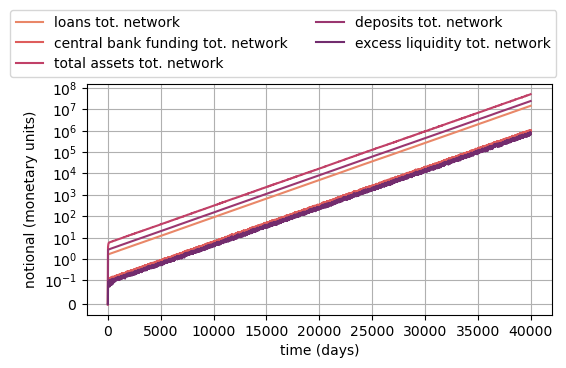

In [33]:
# if necessary, direct re-plot
df = df_network_trajectory
index = "accounting_view/macro_economic_aggregates"
cols=[f"{item}{par.df_figures.loc[index,'extension']}"
                for item in par.df_figures.loc[index, "items"]
            ]

# drop the last col to avoir the weighted network
cols = cols[:-1]
path_results = path
file_name=f"{path_results}{index}.pdf"
fig, ax = plt.subplots(figsize=par.large_figsize)
colors = sns.color_palette("flare", n_colors=len(cols))

# convert the cols of the df using the convertion of first col
df = gx.convert_data(df[cols], par.df_plt.loc[cols[0], "convertion"])

for i, col in enumerate(cols):
    try:
        plt.plot(
            df.index,
            df[col],
            par.df_plt.loc[col, "style"],
            color=colors[i],
        )

    except:
        print(f"bug for {col}")

plt.legend(
    par.df_plt.loc[cols, "legend"],
    loc="upper left",
    bbox_to_anchor=(-0.18, 1.35),
    ncols=2
)
plt.xlabel("time (days)")
plt.ylabel(par.df_plt.loc[cols[0], "label"])
plt.yscale("symlog",linthresh=0.1)
# plt.xscale("log")
plt.grid()
plt.savefig(f"{file_name}.pdf", bbox_inches="tight")
os.makedirs(f"./results/article_plots/accounting_view/",exist_ok=True)
plt.savefig(f"./results/article_plots/typical_run/macro_economic_aggregates.pdf", bbox_inches="tight")

### collateral aggregates

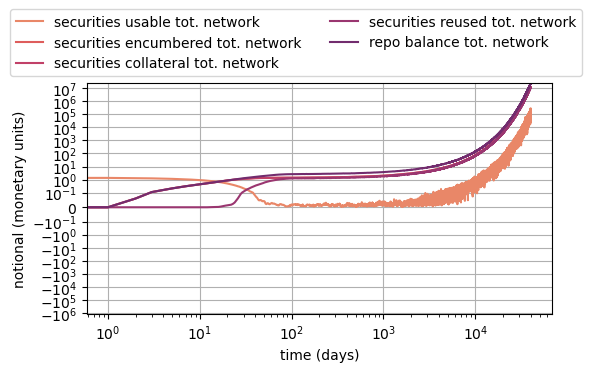

In [15]:
# if necessary, direct re-plot
df = df_network_trajectory
index = "accounting_view/collateral_aggregates"
cols=[f"{item}{par.df_figures.loc[index,'extension']}"
                for item in par.df_figures.loc[index, "items"]
            ]

# drop the last col to avoir the weighted network
# cols = cols[:-1]
path_results = path
file_name=f"{path_results}{index}.pdf"
fig, ax = plt.subplots(figsize=par.large_figsize)
colors = sns.color_palette("flare", n_colors=len(cols))

# convert the cols of the df using the convertion of first col
df = gx.convert_data(df[cols], par.df_plt.loc[cols[0], "convertion"])

for i, col in enumerate(cols):
    try:
        plt.plot(
            df.index,
            df[col],
            par.df_plt.loc[col, "style"],
            color=colors[i],
        )

    except:
        print(f"bug for {col}")

plt.legend(
    par.df_plt.loc[cols, "legend"],
    loc="upper left",
    bbox_to_anchor=(-0.18, 1.35),
    ncols=2
)
plt.xlabel("time (days)")
plt.xscale("log")
plt.ylabel(par.df_plt.loc[cols[0], "label"])
plt.yscale("symlog",linthresh=0.1)
plt.grid()
plt.savefig(f"{file_name}.pdf", bbox_inches="tight")
os.makedirs(f"./results/article_plots/accounting_view/",exist_ok=True)
plt.savefig(f"./results/article_plots/typical_run/collateral_aggregates.pdf", bbox_inches="tight")

### density

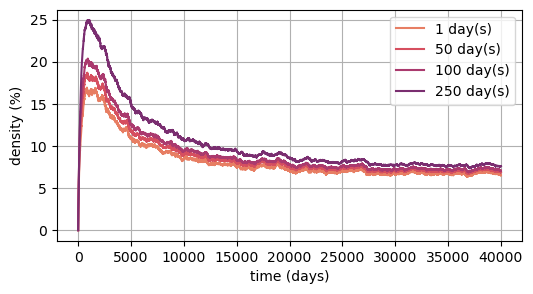

In [16]:
# if necessary, direct re-plot
df = df_network_trajectory
index = "exposure_view/network_density"
cols=[f"{item}{par.df_figures.loc[index,'extension']}"
                for item in par.df_figures.loc[index, "items"]
            ]

# drop the last col to avoir the weighted network
# cols = cols[:-1]
path_results = path
file_name=f"{path_results}{index}.pdf"
fig, ax = plt.subplots(figsize=par.large_figsize)
colors = sns.color_palette("flare", n_colors=len(cols))

# convert the cols of the df using the convertion of first col
df = gx.convert_data(df[cols], par.df_plt.loc[cols[0], "convertion"])

for i, col in enumerate(cols):
    try:
        plt.plot(
            df.index,
            df[col],
            par.df_plt.loc[col, "style"],
            color=colors[i],
        )

    except:
        print(f"bug for {col}")

plt.legend(
    par.df_plt.loc[cols, "legend"],
    # loc="upper left",
    # bbox_to_anchor=(-0.25, 1.44),
)
plt.xlabel("time (days)")
# plt.xscale("log")
plt.ylabel(par.df_plt.loc[cols[0], "label"])
# plt.yscale("symlog",linthresh=0.1)
plt.grid()
plt.savefig(f"{file_name}.pdf", bbox_inches="tight")
os.makedirs(f"./results/article_plots/accounting_view/",exist_ok=True)
plt.savefig(f"./results/article_plots/typical_run/network_density.pdf", bbox_inches="tight")

### jaccard

In [21]:
path = "./results/single_run/test/"
df_network_trajectory = pd.read_csv(f"{path}df_network_trajectory.csv",index_col=0)

/opt/tmp/tmp/ipykernel_96482/2306093135.py:2: DtypeWarning: Columns (46,47,48,49,50,51,52,53,54,55,56,57,62,63,64) have mixed types. Specify dtype option on import or set low_memory=False.
  df_network_trajectory = pd.read_csv(f"{path}df_network_trajectory.csv",index_col=0)


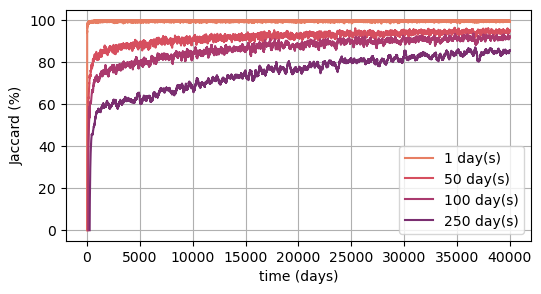

In [22]:
# if necessary, direct re-plot
df = df_network_trajectory.loc[:]
index = "exposure_view/jaccard_index"
cols=[f"{item}{par.df_figures.loc[index,'extension']}"
                for item in par.df_figures.loc[index, "items"]
            ]

# drop the last col to avoir the weighted network
# cols = cols[:-1]
path_results = path
file_name=f"{path_results}{index}.pdf"
fig, ax = plt.subplots(figsize=par.large_figsize)
colors = sns.color_palette("flare", n_colors=len(cols))

# convert the cols of the df using the convertion of first col
df = gx.convert_data(df[cols], par.df_plt.loc[cols[0], "convertion"])

for i, col in enumerate(cols):
    try:
        plt.plot(
            df.index,
            df[col],
            par.df_plt.loc[col, "style"],
            color=colors[i],
        )

    except:
        print(f"bug for {col}")

plt.legend(
    par.df_plt.loc[cols, "legend"],
    # loc="upper left",
    # bbox_to_anchor=(-0.25, 1.44),
)
plt.xlabel("time (days)")
# plt.xscale("log")
plt.ylabel(par.df_plt.loc[cols[0], "label"])
# plt.yscale("symlog",linthresh=0.1)
plt.grid()
# plt.savefig(f"{file_name}.pdf", bbox_inches="tight")
os.makedirs(f"./results/article_plots/accounting_view/",exist_ok=True)
plt.savefig(f"./results/article_plots/typical_run/jaccard_index.pdf", bbox_inches="tight")

# scenarios

## APP

In [45]:
import os
import numpy as np
import cpnet
import networkx as nx
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.colors import ListedColormap
import functions as fct
import parameters as par
import emp_metrics as em
from tqdm import tqdm
import numpy as np
import powerlaw
import os
import graphics as gx
path = "./results/single_run/APP_100_b_20000_steps/"
df_network_trajectory = pd.read_csv(f"{path}df_network_trajectory.csv",index_col=0)

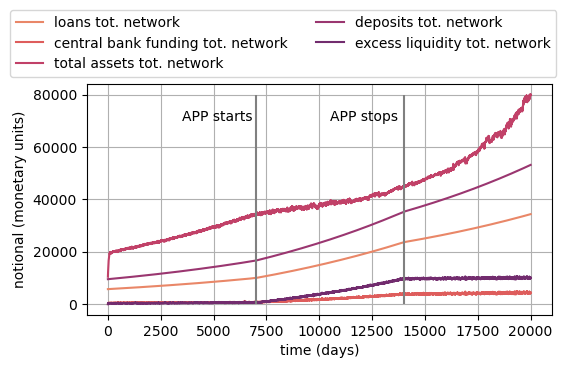

In [60]:
# if necessary, direct re-plot
df = df_network_trajectory
index = "accounting_view/macro_economic_aggregates"
cols=[f"{item}{par.df_figures.loc[index,'extension']}"
                for item in par.df_figures.loc[index, "items"]
            ]

# drop the last col to avoir the weighted network
cols = cols[:-1]
path_results = path
file_name=f"{path_results}{index}.pdf"
fig, ax = plt.subplots(figsize=par.large_figsize)
colors = sns.color_palette("flare", n_colors=len(cols))

# convert the cols of the df using the convertion of first col
df = gx.convert_data(df[cols], par.df_plt.loc[cols[0], "convertion"])

for i, col in enumerate(cols):
    try:
        plt.plot(
            df.index,
            df[col],
            par.df_plt.loc[col, "style"],
            color=colors[i],
        )

    except:
        print(f"bug for {col}")

plt.legend(
    par.df_plt.loc[cols, "legend"],
    loc="upper left",
    bbox_to_anchor=(-0.18, 1.35),
    ncols=2
)
plt.vlines(x=[7000,14000],colors=["0.5","0.5"],ymin=0,ymax=80000)
plt.text(x=3500,y=70000,s="APP starts")
plt.text(x=10500,y=70000,s="APP stops")
plt.xlabel("time (days)")
plt.ylabel(par.df_plt.loc[cols[0], "label"])
# plt.yscale("symlog",linthresh=0.1)
plt.grid()
# plt.savefig(f"{file_name}.pdf", bbox_inches="tight")
os.makedirs(f"./results/article_plots/accounting_view/",exist_ok=True)
plt.savefig(f"./results/article_plots/APP/macro_economic_aggregates.pdf", bbox_inches="tight")

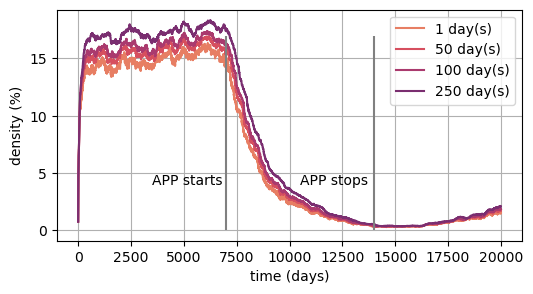

In [63]:
# if necessary, direct re-plot
df = df_network_trajectory
index = "exposure_view/network_density"
cols=[f"{item}{par.df_figures.loc[index,'extension']}"
                for item in par.df_figures.loc[index, "items"]
            ]

# drop the last col to avoir the weighted network
# cols = cols[:-1]
path_results = path
file_name=f"{path_results}{index}.pdf"
fig, ax = plt.subplots(figsize=par.large_figsize)
colors = sns.color_palette("flare", n_colors=len(cols))

# convert the cols of the df using the convertion of first col
df = gx.convert_data(df[cols], par.df_plt.loc[cols[0], "convertion"])

for i, col in enumerate(cols):
    try:
        plt.plot(
            df.index,
            df[col],
            par.df_plt.loc[col, "style"],
            color=colors[i],
        )

    except:
        print(f"bug for {col}")

plt.legend(
    par.df_plt.loc[cols, "legend"],
    # loc="upper left",
    # bbox_to_anchor=(-0.25, 1.44),
)
plt.vlines(x=[7000,14000],colors=["0.5","0.5"],ymin=0,ymax=17)
plt.text(x=3500,y=4,s="APP starts")
plt.text(x=10500,y=4,s="APP stops")
plt.xlabel("time (days)")
# plt.xscale("log")
plt.ylabel(par.df_plt.loc[cols[0], "label"])
# plt.yscale("symlog",linthresh=0.1)
plt.grid()
# plt.savefig(f"{file_name}.pdf", bbox_inches="tight")
os.makedirs(f"./results/article_plots/APP/",exist_ok=True)
plt.savefig(f"./results/article_plots/APP/network_density.pdf", bbox_inches="tight")

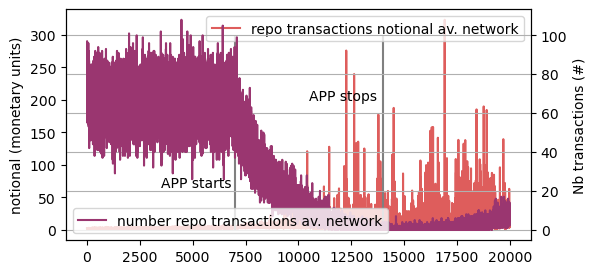

In [70]:
# if necessary, direct re-plot
df = df_network_trajectory
index = "exposure_view/network_density"
cols=["repo transactions notional av. network",
      "number repo transactions av. network"
            ]

# drop the last col to avoir the weighted network
# cols = cols[:-1]
path_results = path
file_name=f"{path_results}{index}.pdf"
fig, ax = plt.subplots(figsize=par.large_figsize)
colors = sns.color_palette("flare", n_colors=len(cols))

# convert the cols of the df using the convertion of first col
df = gx.convert_data(df[cols], par.df_plt.loc[cols[0], "convertion"])

ax.plot(
    df.index,
    df[cols[0]],
    par.df_plt.loc[cols[0], "style"],
    color=colors[0],
)
ax.set_ylabel(par.df_plt.loc[cols[0], "label"])

ax2 = ax.twinx()

ax2.plot(
    df.index,
    df[cols[1]],
    par.df_plt.loc[cols[1], "style"],
    color=colors[1],
)
ax2.set_ylabel(par.df_plt.loc[cols[1], "label"])


ax.legend(
    [par.df_plt.loc[cols[0], "legend"]],
    loc="upper right",
    
    # bbox_to_anchor=(-0.25, 1.44),
)
ax2.legend(
    [par.df_plt.loc[cols[1], "legend"]],
    loc="lower left",
    # bbox_to_anchor=(-0.25, 1.44),
)

ax.vlines(x=[7000,14000],colors=["0.5","0.5"],ymin=0,ymax=300)
ax.text(x=3500,y=65,s="APP starts")
ax.text(x=10500,y=200,s="APP stops")

plt.xlabel("time (days)")
# plt.xscale("log")

# plt.yscale("symlog",linthresh=0.1)
plt.grid()
# plt.savefig(f"{file_name}.pdf", bbox_inches="tight")
os.makedirs(f"./results/article_plots/APP/",exist_ok=True)
plt.savefig(f"./results/article_plots/APP/transactions.pdf", bbox_inches="tight")

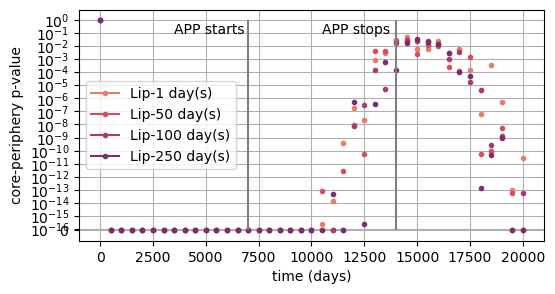

In [46]:
# if necessary, direct re-plot
df = df_network_trajectory
index = "exposure_view/core-periphery/cpnet_pvalue-Lip"
cols=[f"{item}{par.df_figures.loc[index,'extension']}"
                for item in par.df_figures.loc[index, "items"]
            ]

# drop the last col to avoir the weighted network
cols = cols[:-1]
path_results = path
file_name=f"{path_results}{index}.pdf"
fig, ax = plt.subplots(figsize=par.large_figsize)
colors = sns.color_palette("flare", n_colors=len(cols))

# convert the cols of the df using the convertion of first col
df = gx.convert_data(df[cols], par.df_plt.loc[cols[0], "convertion"])

for i, col in enumerate(cols):
    try:
        plt.plot(
            df.index,
            df[col],
            ".-",
            color=colors[i],
        )

    except:
        print(f"bug for {col}")

plt.legend(
    par.df_plt.loc[cols, "legend"],
    # loc="upper left",
    # bbox_to_anchor=(0.25, 0.95),
)

ax.vlines(x=[7000,14000],colors=["0.5","0.5"],ymin=0,ymax=1)
ax.text(x=3500,y=0.1,s="APP starts")
ax.text(x=10500,y=0.1,s="APP stops")

plt.xlabel("time (days)")
plt.ylabel(par.df_plt.loc[cols[0], "label"])
plt.yscale(par.df_plt.loc[cols[0], "scale"],linthresh=1e-15)
plt.grid()
# plt.savefig(f"{file_name}.pdf", bbox_inches="tight")
os.makedirs(f"./results/article_plots/exposure_view/core-periphery/",exist_ok=True)
plt.savefig(f"./results/article_plots/APP/cpnet_pvalue-Lip.pdf", bbox_inches="tight")

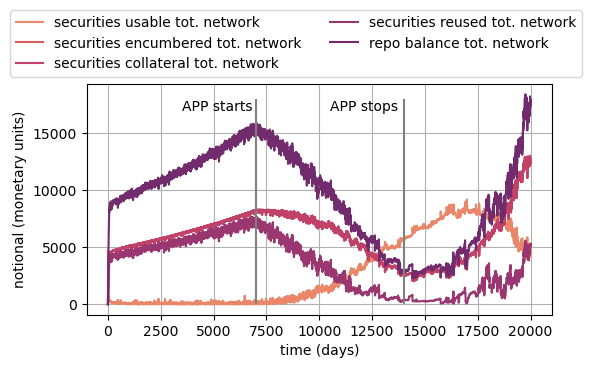

In [72]:
# if necessary, direct re-plot
df = df_network_trajectory
index = "accounting_view/collateral_aggregates"
cols=[f"{item}{par.df_figures.loc[index,'extension']}"
                for item in par.df_figures.loc[index, "items"]
            ]

# drop the last col to avoir the weighted network
# cols = cols[:-1]
path_results = path
file_name=f"{path_results}{index}.pdf"
fig, ax = plt.subplots(figsize=par.large_figsize)
colors = sns.color_palette("flare", n_colors=len(cols))

# convert the cols of the df using the convertion of first col
df = gx.convert_data(df[cols], par.df_plt.loc[cols[0], "convertion"])

for i, col in enumerate(cols):
    try:
        plt.plot(
            df.index,
            df[col],
            par.df_plt.loc[col, "style"],
            color=colors[i],
        )

    except:
        print(f"bug for {col}")

plt.legend(
    par.df_plt.loc[cols, "legend"],
    loc="upper left",
    bbox_to_anchor=(-0.18, 1.35),
    ncols=2
)
ax.vlines(x=[7000,14000],colors=["0.5","0.5"],ymin=0,ymax=18000)
ax.text(x=3500,y=17000,s="APP starts")
ax.text(x=10500,y=17000,s="APP stops")
plt.xlabel("time (days)")
# plt.xscale("log")
plt.ylabel(par.df_plt.loc[cols[0], "label"])
# plt.yscale("symlog",linthresh=0.1)
plt.grid()
# plt.savefig(f"{file_name}.pdf", bbox_inches="tight")
os.makedirs(f"./results/article_plots/accounting_view/",exist_ok=True)
plt.savefig(f"./results/article_plots/APP/collateral_aggregates.pdf", bbox_inches="tight")

In [37]:
par.df_plt.loc[cols[0], "legend"]

'repo transactions notional av. network'

## GFC

In [58]:
import os
import numpy as np
import cpnet
import networkx as nx
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.colors import ListedColormap
import functions as fct
import parameters as par
import emp_metrics as em
from tqdm import tqdm
import numpy as np
import powerlaw
import os
import graphics as gx
path = "./results/single_run/GFC_test/"
df_network_trajectory = pd.read_csv(f"{path}df_network_trajectory.csv",index_col=0)

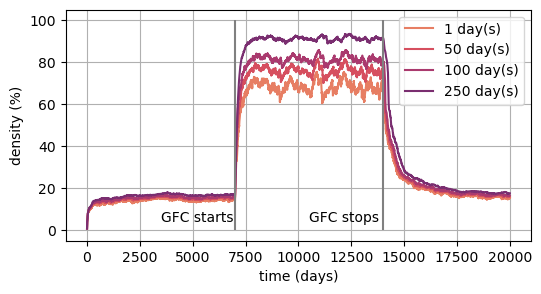

In [4]:
# if necessary, direct re-plot
df = df_network_trajectory
index = "exposure_view/network_density"
cols=[f"{item}{par.df_figures.loc[index,'extension']}"
                for item in par.df_figures.loc[index, "items"]
            ]

# drop the last col to avoir the weighted network
# cols = cols[:-1]
path_results = path
file_name=f"{path_results}{index}.pdf"
fig, ax = plt.subplots(figsize=par.large_figsize)
colors = sns.color_palette("flare", n_colors=len(cols))

# convert the cols of the df using the convertion of first col
df = gx.convert_data(df[cols], par.df_plt.loc[cols[0], "convertion"])

for i, col in enumerate(cols):
    try:
        plt.plot(
            df.index,
            df[col],
            par.df_plt.loc[col, "style"],
            color=colors[i],
        )

    except:
        print(f"bug for {col}")

plt.legend(
    par.df_plt.loc[cols, "legend"],
    # loc="upper left",
    # bbox_to_anchor=(-0.25, 1.44),
)
plt.vlines(x=[7000,14000],colors=["0.5","0.5"],ymin=0,ymax=100)
plt.text(x=3500,y=4,s="GFC starts")
plt.text(x=10500,y=4,s="GFC stops")
plt.xlabel("time (days)")
# plt.xscale("log")
plt.ylabel(par.df_plt.loc[cols[0], "label"])
# plt.yscale("symlog",linthresh=0.1)
plt.grid()
# plt.savefig(f"{file_name}.pdf", bbox_inches="tight")
os.makedirs(f"./results/article_plots/GFC/",exist_ok=True)
plt.savefig(f"./results/article_plots/GFC/network_density.pdf", bbox_inches="tight")

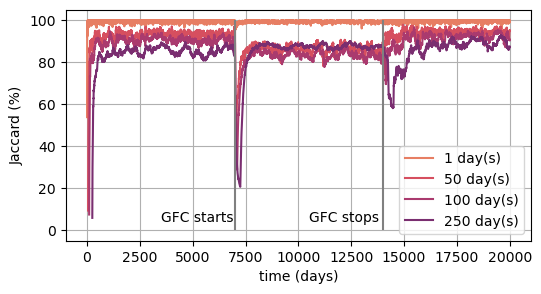

In [41]:
# if necessary, direct re-plot
df = df_network_trajectory
index = "exposure_view/jaccard_index"
cols=[f"{item}{par.df_figures.loc[index,'extension']}"
                for item in par.df_figures.loc[index, "items"]
            ]

# drop the last col to avoir the weighted network
# cols = cols[:-1]
path_results = path
file_name=f"{path_results}{index}.pdf"
fig, ax = plt.subplots(figsize=par.large_figsize)
colors = sns.color_palette("flare", n_colors=len(cols))

# convert the cols of the df using the convertion of first col
df = gx.convert_data(df[cols], par.df_plt.loc[cols[0], "convertion"])

for i, col in enumerate(cols):
    try:
        plt.plot(
            df.index,
            df[col],
            par.df_plt.loc[col, "style"],
            color=colors[i],
        )

    except:
        print(f"bug for {col}")

plt.legend(
    par.df_plt.loc[cols, "legend"],
    # loc="upper left",
    # bbox_to_anchor=(-0.25, 1.44),
)
plt.vlines(x=[7000,14000],colors=["0.5","0.5"],ymin=0,ymax=100)
plt.text(x=3500,y=4,s="GFC starts")
plt.text(x=10500,y=4,s="GFC stops")
plt.xlabel("time (days)")
# plt.xscale("log")
plt.ylabel(par.df_plt.loc[cols[0], "label"])
# plt.yscale("symlog",linthresh=0.1)
plt.grid()
# plt.savefig(f"{file_name}.pdf", bbox_inches="tight")
os.makedirs(f"./results/article_plots/GFC/",exist_ok=True)
plt.savefig(f"./results/article_plots/GFC/jaccard_index.pdf", bbox_inches="tight")

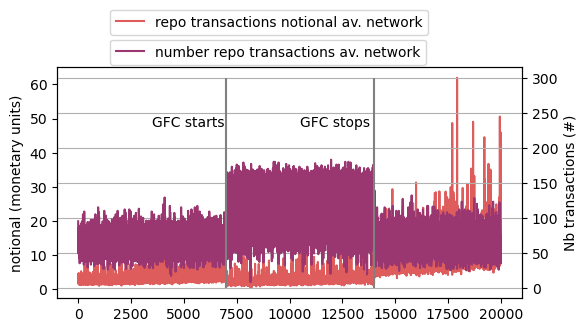

In [38]:
# if necessary, direct re-plot
df = df_network_trajectory
cols=["repo transactions notional av. network",
      "number repo transactions av. network"
            ]

# drop the last col to avoir the weighted network
# cols = cols[:-1]
path_results = path
file_name=f"{path_results}{index}.pdf"
fig, ax = plt.subplots(figsize=par.large_figsize)
colors = sns.color_palette("flare", n_colors=len(cols))

# convert the cols of the df using the convertion of first col
df = gx.convert_data(df[cols], par.df_plt.loc[cols[0], "convertion"])

ax.plot(
    df.index,
    df[cols[0]],
    par.df_plt.loc[cols[0], "style"],
    color=colors[0],
    zorder=2
)
ax.set_ylabel(par.df_plt.loc[cols[0], "label"])

ax2 = ax.twinx()

ax2.plot(
    df.index,
    df[cols[1]],
    par.df_plt.loc[cols[1], "style"],
    color=colors[1],
    zorder=2
)
ax2.set_ylabel(par.df_plt.loc[cols[1], "label"])


ax.legend(
    [par.df_plt.loc[cols[0], "legend"]],
    loc="upper left",
    
    bbox_to_anchor=(0.1, 1.28),
)
ax2.legend(
    [par.df_plt.loc[cols[1], "legend"]],
    loc="upper left",
    bbox_to_anchor=(0.1, 1.15),
)

ax2.vlines(x=[7000,14000],colors=["0.5","0.5"],ymin=0,ymax=300, zorder=10)
ax2.text(x=3500,y=230,s="GFC starts", zorder=10)
ax2.text(x=10500,y=230,s="GFC stops", zorder=10)

plt.xlabel("time (days)")
# plt.xscale("log")

# plt.yscale("symlog",linthresh=0.1)
plt.grid()
# plt.savefig(f"{file_name}.pdf", bbox_inches="tight")
os.makedirs(f"./results/article_plots/GFC/",exist_ok=True)
plt.savefig(f"./results/article_plots/GFC/transactions.pdf", bbox_inches="tight")

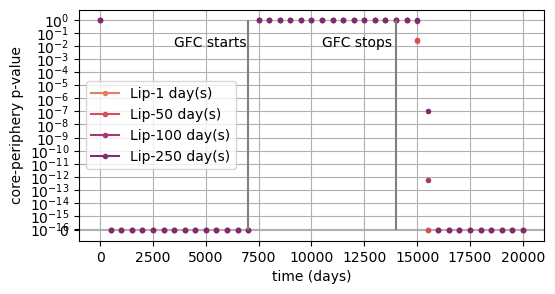

In [59]:
# if necessary, direct re-plot
df = df_network_trajectory
index = "exposure_view/core-periphery/cpnet_pvalue-Lip"
cols=[f"{item}{par.df_figures.loc[index,'extension']}"
                for item in par.df_figures.loc[index, "items"]
            ]

# drop the last col to avoir the weighted network
cols = cols[:-1]
path_results = path
file_name=f"{path_results}{index}.pdf"
fig, ax = plt.subplots(figsize=par.large_figsize)
colors = sns.color_palette("flare", n_colors=len(cols))

# convert the cols of the df using the convertion of first col
df = gx.convert_data(df[cols], par.df_plt.loc[cols[0], "convertion"])

for i, col in enumerate(cols):
    try:
        plt.plot(
            df.index,
            df[col],
            par.df_plt.loc[col, "style"],
            color=colors[i],
        )

    except:
        print(f"bug for {col}")

plt.legend(
    par.df_plt.loc[cols, "legend"],
    # loc="upper left",
    # bbox_to_anchor=(0.25, 0.95),
)

ax.vlines(x=[7000,14000],colors=["0.5","0.5"],ymin=0,ymax=1)
ax.text(x=3500,y=0.01,s="GFC starts")
ax.text(x=10500,y=0.01,s="GFC stops")

plt.xlabel("time (days)")
plt.ylabel(par.df_plt.loc[cols[0], "label"])
plt.yscale(par.df_plt.loc[cols[0], "scale"],linthresh=1e-15)
plt.grid()
# plt.savefig(f"{file_name}.pdf", bbox_inches="tight")
os.makedirs(f"./results/article_plots/exposure_view/core-periphery/",exist_ok=True)
plt.savefig(f"./results/article_plots/GFC/cpnet_pvalue-Lip.pdf", bbox_inches="tight")

# parameter space

In [ ]:
# collect results into df_network_sensitivity
df_network_sensitivity, sr_errors = fct.get_df_network_sensitivity("./results/parameter_space/test/runs/")

In [20]:
import os
import numpy as np
import cpnet
import networkx as nx
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.colors import ListedColormap
import functions as fct
import parameters as par
import emp_metrics as em
from tqdm import tqdm
import numpy as np
import powerlaw
import os
import graphics as gx

path = "./results/parameter_space/test/"

# plot the sensitivity
df_network_sensitivity = pd.read_csv(f"{path}runs/df_network_sensitivity.csv", index_col=(0,1,2))
# gx.plot_all_sensitivities(df_network_sensitivity,path=path)

## learning coefficient

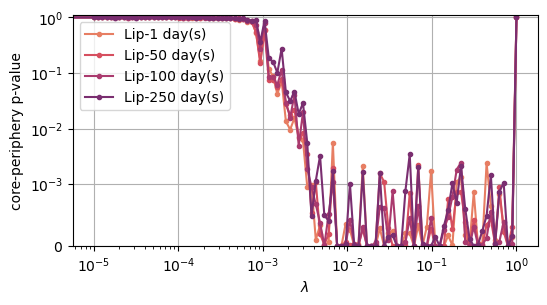

In [14]:
# define figure
fig, ax = plt.subplots(figsize=par.large_figsize)


input_parameter = "learning_speed"
metric = "exposure_view/core-periphery/cpnet_pvalue-Lip"
cols=[f"{item}{par.df_figures.loc[metric,'extension']}" for item in par.df_figures.loc[metric, "items"]]
cols = cols[:-1]
colors = sns.color_palette("flare", n_colors=len(cols))
# path = "./results/article_plots/parameter_space/"
path = "./results/parameter_space/test/"
os.makedirs(f"{path}{metric}/",exist_ok=True)
file_name=f"{path}{metric}/{input_parameter}.pdf"

# filter on index
df = df_network_sensitivity.loc[input_parameter].groupby(level=0).apply(lambda group: group.apply(fct.filtered_mean, axis=0))

# convert the cols of the df using the convertion of first col
df = gx.convert_data(df[cols], par.df_plt.loc[cols[0], "convertion"])

# convert the index
df = gx.convert_index(
    df,
    par.df_plt.loc[input_parameter, "convertion"],
)

# sort index
df.sort_index(inplace=True)


# filter on columns
for i, col in enumerate(cols):
    plt.plot(df.index, df[col], ".-", color=colors[i])

# set legend
lgd = plt.legend(
    par.df_plt.loc[cols, "legend"], 
    # loc="upper left", 
    # bbox_to_anchor=(1, 1)
)
plt.xlabel(par.df_plt.loc[input_parameter, "label"])
plt.ylabel(par.df_plt.loc[cols[0], "label"])
plt.xscale(par.df_plt.loc[input_parameter, "scale"])
if par.df_plt.loc[cols[0], "scale"] == "symlog":
    plt.yscale(par.df_plt.loc[cols[0], "scale"],linthresh=1e-10)
else:
    plt.yscale(par.df_plt.loc[cols[0], "scale"])
plt.yscale("symlog",linthresh=1e-3)
plt.ylim(0,1.1)
plt.grid()
plt.savefig(
    f"{file_name}",
    bbox_inches="tight",
    bbox_extra_artists=(lgd,),
)

## power law exponent

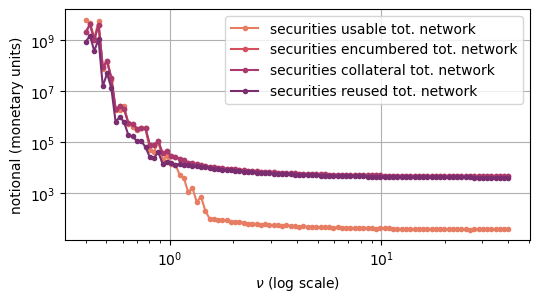

In [15]:
# define figure
fig, ax = plt.subplots(figsize=par.large_figsize)


input_parameter = "alpha_pareto"
metric = "accounting_view/collateral_aggregates"
cols=[f"{item}{par.df_figures.loc[metric,'extension']}" for item in par.df_figures.loc[metric, "items"]]
cols = cols[:-1]
colors = sns.color_palette("flare", n_colors=len(cols))
# path = "./results/article_plots/parameter_space/"
path = "./results/parameter_space/test/"
os.makedirs(f"{path}{metric}/",exist_ok=True)
file_name=f"{path}{metric}/{input_parameter}.pdf"

# filter on index
df = df_network_sensitivity.loc[input_parameter].groupby(level=0).apply(lambda group: group.apply(fct.filtered_mean, axis=0))

# convert the cols of the df using the convertion of first col
df = gx.convert_data(df[cols], par.df_plt.loc[cols[0], "convertion"])

# convert the index
df = gx.convert_index(
    df,
    par.df_plt.loc[input_parameter, "convertion"],
)

# sort index
df.sort_index(inplace=True)


# filter on columns
for i, col in enumerate(cols):
    plt.plot(df.index, df[col], ".-", color=colors[i])

# set legend
lgd = plt.legend(
    par.df_plt.loc[cols, "legend"], 
    # loc="upper left", 
    # bbox_to_anchor=(1, 1)
)
plt.xlabel(par.df_plt.loc[input_parameter, "label"])
plt.ylabel(par.df_plt.loc[cols[0], "label"])
plt.xscale(par.df_plt.loc[input_parameter, "scale"])
if par.df_plt.loc[cols[0], "scale"] == "symlog":
    plt.yscale(par.df_plt.loc[cols[0], "scale"],linthresh=1e-10)
else:
    plt.yscale("log")
plt.yscale("log")
plt.grid()
plt.savefig(
    f"{file_name}",
    bbox_inches="tight",
    bbox_extra_artists=(lgd,),
)

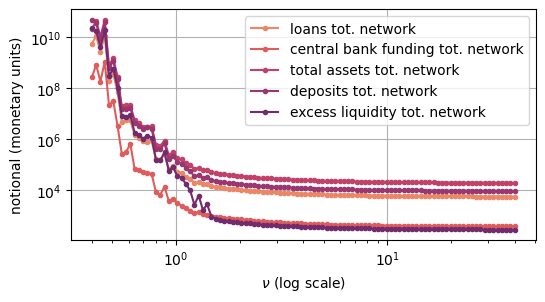

In [16]:
# define figure
fig, ax = plt.subplots(figsize=par.large_figsize)


input_parameter = "alpha_pareto"
metric = "accounting_view/macro_economic_aggregates"
cols=[f"{item}{par.df_figures.loc[metric,'extension']}" for item in par.df_figures.loc[metric, "items"]]
cols = cols[:-1]
colors = sns.color_palette("flare", n_colors=len(cols))
# path = "./results/article_plots/parameter_space/"
path = "./results/parameter_space/test/"
os.makedirs(f"{path}{metric}/",exist_ok=True)
file_name=f"{path}{metric}/{input_parameter}.pdf"

# filter on index
df = df_network_sensitivity.loc[input_parameter].groupby(level=0).apply(lambda group: group.apply(fct.filtered_mean, axis=0))

# convert the cols of the df using the convertion of first col
df = gx.convert_data(df[cols], par.df_plt.loc[cols[0], "convertion"])

# convert the index
df = gx.convert_index(
    df,
    par.df_plt.loc[input_parameter, "convertion"],
)

# sort index
df.sort_index(inplace=True)


# filter on columns
for i, col in enumerate(cols):
    plt.plot(df.index, df[col], ".-", color=colors[i])

# set legend
lgd = plt.legend(
    par.df_plt.loc[cols, "legend"], 
    # loc="upper left", 
    # bbox_to_anchor=(1, 1)
)
plt.xlabel(par.df_plt.loc[input_parameter, "label"])
plt.ylabel(par.df_plt.loc[cols[0], "label"])
plt.xscale(par.df_plt.loc[input_parameter, "scale"])
if par.df_plt.loc[cols[0], "scale"] == "symlog":
    plt.yscale(par.df_plt.loc[cols[0], "scale"],linthresh=1e-10)
else:
    plt.yscale("log")
plt.yscale("log")
plt.grid()
plt.savefig(
    f"{file_name}",
    bbox_inches="tight",
    bbox_extra_artists=(lgd,),
)

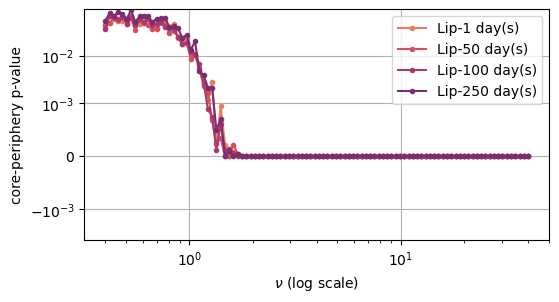

In [17]:
# define figure
fig, ax = plt.subplots(figsize=par.large_figsize)


input_parameter = "alpha_pareto"
metric = "exposure_view/core-periphery/cpnet_pvalue-Lip"
cols=[f"{item}{par.df_figures.loc[metric,'extension']}" for item in par.df_figures.loc[metric, "items"]]
cols = cols[:-1]
colors = sns.color_palette("flare", n_colors=len(cols))
# path = "./results/article_plots/parameter_space/"
path = "./results/parameter_space/test/"
os.makedirs(f"{path}{metric}/",exist_ok=True)
file_name=f"{path}{metric}/{input_parameter}.pdf"

# filter on index
df = df_network_sensitivity.loc[input_parameter].groupby(level=0).apply(lambda group: group.apply(fct.filtered_mean, axis=0))

# convert the cols of the df using the convertion of first col
df = gx.convert_data(df[cols], par.df_plt.loc[cols[0], "convertion"])

# convert the index
df = gx.convert_index(
    df,
    par.df_plt.loc[input_parameter, "convertion"],
)

# sort index
df.sort_index(inplace=True)


# filter on columns
for i, col in enumerate(cols):
    plt.plot(df.index, df[col], ".-", color=colors[i])

# set legend
lgd = plt.legend(
    par.df_plt.loc[cols, "legend"], 
    # loc="upper left", 
    # bbox_to_anchor=(1, 1)
)
plt.xlabel(par.df_plt.loc[input_parameter, "label"])
plt.ylabel(par.df_plt.loc[cols[0], "label"])
plt.xscale(par.df_plt.loc[input_parameter, "scale"])
if par.df_plt.loc[cols[0], "scale"] == "symlog":
    plt.yscale(par.df_plt.loc[cols[0], "scale"],linthresh=1e-10)
else:
    plt.yscale(par.df_plt.loc[cols[0], "scale"])
plt.yscale("symlog",linthresh=1e-3)
plt.grid()
plt.savefig(
    f"{file_name}",
    bbox_inches="tight",
    bbox_extra_artists=(lgd,),
)

## shock vol

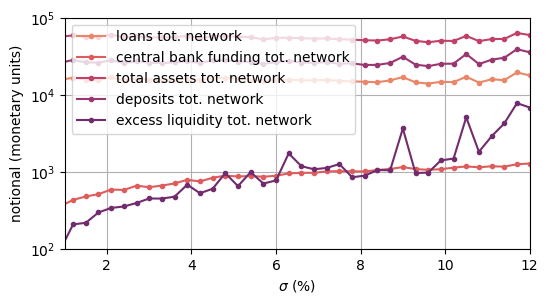

In [43]:
fig, ax = plt.subplots(figsize=par.large_figsize)


input_parameter = "shocks_vol"
metric = "accounting_view/macro_economic_aggregates"
cols=[f"{item}{par.df_figures.loc[metric,'extension']}" for item in par.df_figures.loc[metric, "items"]]
cols = cols[:-1]
colors = sns.color_palette("flare", n_colors=len(cols))
# path = "./results/article_plots/parameter_space/"
path = "./results/parameter_space/test/"
os.makedirs(f"{path}{metric}/",exist_ok=True)
file_name=f"{path}{metric}/{input_parameter}.pdf"

# filter on index
df = df_network_sensitivity.loc[input_parameter].groupby(level=0).apply(lambda group: group.apply(fct.filtered_mean, axis=0))

# convert the cols of the df using the convertion of first col
df = gx.convert_data(df[cols], par.df_plt.loc[cols[0], "convertion"])

# convert the index
df = gx.convert_index(
    df,
    par.df_plt.loc[input_parameter, "convertion"],
)

# sort index
df.sort_index(inplace=True)


# filter on columns
for i, col in enumerate(cols):
    plt.plot(df.index, df[col], ".-", color=colors[i])

# set legend
lgd = plt.legend(
    par.df_plt.loc[cols, "legend"], 
    loc="upper left", 
    # bbox_to_anchor=(1, 1)
)
plt.xlabel(par.df_plt.loc[input_parameter, "label"])
plt.ylabel(par.df_plt.loc[cols[0], "label"])
plt.xscale(par.df_plt.loc[input_parameter, "scale"])
# if par.df_plt.loc[cols[0], "scale"] == "symlog":
#     plt.yscale(par.df_plt.loc[cols[0], "scale"],linthresh=1e-10)
# else:
#     plt.yscale("log")
plt.yscale("symlog",linthresh=10)
plt.xlim(1,12)
plt.ylim(1e2,1e5)
plt.grid()
plt.savefig(
    f"{file_name}",
    bbox_inches="tight",
    bbox_extra_artists=(lgd,),
)

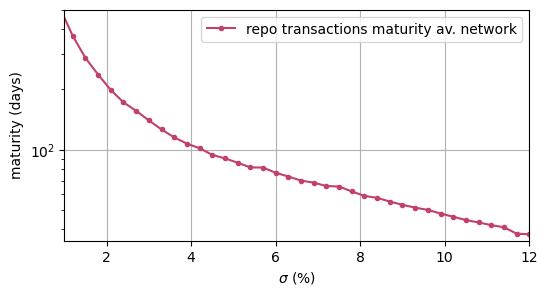

In [41]:
fig, ax = plt.subplots(figsize=par.large_figsize)


input_parameter = "shocks_vol"
metric = "transaction_view/repo_transactions_maturity_av_network"
cols=[f"{item}{par.df_figures.loc[metric,'extension']}" for item in par.df_figures.loc[metric, "items"]]
colors = sns.color_palette("flare", n_colors=len(cols))
# path = "./results/article_plots/parameter_space/"
path = "./results/parameter_space/test/"
os.makedirs(f"{path}{metric}/",exist_ok=True)
file_name=f"{path}{metric}/{input_parameter}.pdf"

# filter on index
df = df_network_sensitivity.loc[input_parameter].groupby(level=0).apply(lambda group: group.apply(fct.filtered_mean, axis=0))

# convert the cols of the df using the convertion of first col
df = gx.convert_data(df[cols], par.df_plt.loc[cols[0], "convertion"])

# convert the index
df = gx.convert_index(
    df,
    par.df_plt.loc[input_parameter, "convertion"],
)

# sort index
df.sort_index(inplace=True)


# filter on columns
for i, col in enumerate(cols):
    plt.plot(df.index, df[col], ".-", color=colors[i])

# set legend
lgd = plt.legend(
    par.df_plt.loc[cols, "legend"], 
    # loc="upper left", 
    # bbox_to_anchor=(1, 1)
)
plt.xlabel(par.df_plt.loc[input_parameter, "label"])
plt.ylabel(par.df_plt.loc[cols[0], "label"])
plt.xscale(par.df_plt.loc[input_parameter, "scale"])
if par.df_plt.loc[cols[0], "scale"] == "symlog":
    plt.yscale(par.df_plt.loc[cols[0], "scale"],linthresh=1e-10)
else:
    plt.yscale("log")
plt.yscale("log")
plt.xlim(1,12)
plt.ylim(35,500)
plt.grid()
plt.savefig(
    f"{file_name}",
    bbox_inches="tight",
    bbox_extra_artists=(lgd,),
)

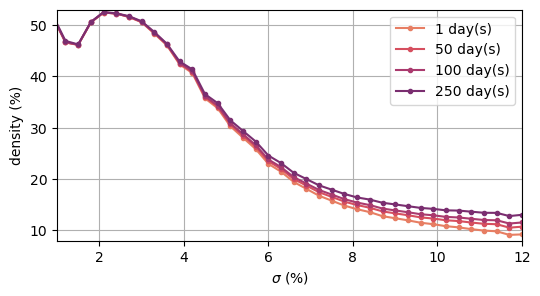

In [37]:
fig, ax = plt.subplots(figsize=par.large_figsize)


input_parameter = "shocks_vol"
metric = "exposure_view/network_density"
cols=[f"{item}{par.df_figures.loc[metric,'extension']}" for item in par.df_figures.loc[metric, "items"]]
colors = sns.color_palette("flare", n_colors=len(cols))
# path = "./results/article_plots/parameter_space/"
path = "./results/parameter_space/test/"
os.makedirs(f"{path}{metric}/",exist_ok=True)
file_name=f"{path}{metric}/{input_parameter}.pdf"

# filter on index
df = df_network_sensitivity.loc[input_parameter].groupby(level=0).apply(lambda group: group.apply(fct.filtered_mean, axis=0))

# convert the cols of the df using the convertion of first col
df = gx.convert_data(df[cols], par.df_plt.loc[cols[0], "convertion"])

# convert the index
df = gx.convert_index(
    df,
    par.df_plt.loc[input_parameter, "convertion"],
)

# sort index
df.sort_index(inplace=True)


# filter on columns
for i, col in enumerate(cols):
    plt.plot(df.index, df[col], ".-", color=colors[i])

# set legend
lgd = plt.legend(
    par.df_plt.loc[cols, "legend"], 
    # loc="upper left", 
    # bbox_to_anchor=(1, 1)
)
plt.xlim(1,12)
plt.ylim(8,53)
plt.xlabel(par.df_plt.loc[input_parameter, "label"])
plt.ylabel(par.df_plt.loc[cols[0], "label"])
plt.xscale(par.df_plt.loc[input_parameter, "scale"])

plt.grid()
plt.savefig(
    f"{file_name}",
    bbox_inches="tight",
    bbox_extra_artists=(lgd,),
)

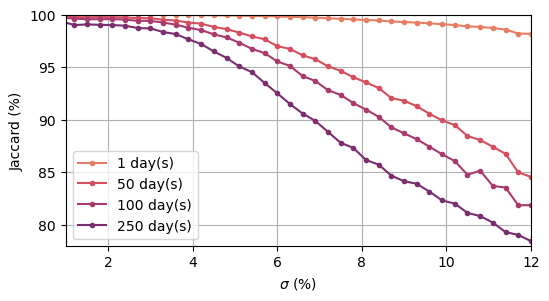

In [49]:
fig, ax = plt.subplots(figsize=par.large_figsize)


input_parameter = "shocks_vol"
metric = "exposure_view/jaccard_index"
cols=[f"{item}{par.df_figures.loc[metric,'extension']}" for item in par.df_figures.loc[metric, "items"]]
colors = sns.color_palette("flare", n_colors=len(cols))
# path = "./results/article_plots/parameter_space/"
path = "./results/parameter_space/test/"
os.makedirs(f"{path}{metric}/",exist_ok=True)
file_name=f"{path}{metric}/{input_parameter}.pdf"

# filter on index
df = df_network_sensitivity.loc[input_parameter].groupby(level=0).apply(lambda group: group.apply(fct.filtered_mean, axis=0))

# convert the cols of the df using the convertion of first col
df = gx.convert_data(df[cols], par.df_plt.loc[cols[0], "convertion"])

# convert the index
df = gx.convert_index(
    df,
    par.df_plt.loc[input_parameter, "convertion"],
)

# sort index
df.sort_index(inplace=True)


# filter on columns
for i, col in enumerate(cols):
    plt.plot(df.index, df[col], ".-", color=colors[i])

# set legend
lgd = plt.legend(
    par.df_plt.loc[cols, "legend"], 
    # loc="upper left", 
    # bbox_to_anchor=(1, 1)
)
plt.xlim(1,12)
plt.ylim(78,100)
plt.xlabel(par.df_plt.loc[input_parameter, "label"])
plt.ylabel(par.df_plt.loc[cols[0], "label"])
plt.xscale(par.df_plt.loc[input_parameter, "scale"])

plt.grid()
plt.savefig(
    f"{file_name}",
    bbox_inches="tight",
    bbox_extra_artists=(lgd,),
)

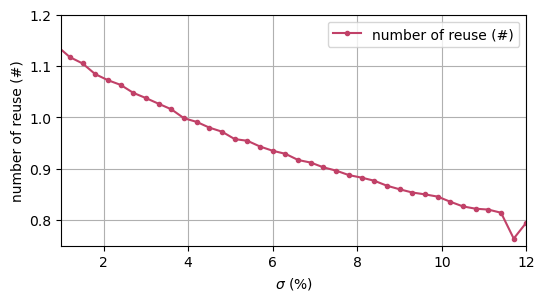

In [46]:
fig, ax = plt.subplots(figsize=par.large_figsize)


input_parameter = "shocks_vol"
metric = "accounting_view/collateral_reuse"
cols=[f"{item}{par.df_figures.loc[metric,'extension']}" for item in par.df_figures.loc[metric, "items"]]
colors = sns.color_palette("flare", n_colors=len(cols))
# path = "./results/article_plots/parameter_space/"
path = "./results/parameter_space/test/"
os.makedirs(f"{path}{metric}/",exist_ok=True)
file_name=f"{path}{metric}/{input_parameter}.pdf"

# filter on index
df = df_network_sensitivity.loc[input_parameter].groupby(level=0).apply(lambda group: group.apply(fct.filtered_mean, axis=0))

# convert the cols of the df using the convertion of first col
df = gx.convert_data(df[cols], par.df_plt.loc[cols[0], "convertion"])

# convert the index
df = gx.convert_index(
    df,
    par.df_plt.loc[input_parameter, "convertion"],
)

# sort index
df.sort_index(inplace=True)


# filter on columns
for i, col in enumerate(cols):
    plt.plot(df.index, df[col], ".-", color=colors[i])

# set legend
lgd = plt.legend(
    par.df_plt.loc[cols, "legend"], 
    # loc="upper left", 
    # bbox_to_anchor=(1, 1)
)
plt.xlim(1,12)
plt.ylim(0.75,1.2)
plt.xlabel(par.df_plt.loc[input_parameter, "label"])
plt.ylabel(par.df_plt.loc[cols[0], "label"])
plt.xscale(par.df_plt.loc[input_parameter, "scale"])

plt.grid()
plt.savefig(
    f"{file_name}",
    bbox_inches="tight",
    bbox_extra_artists=(lgd,),
)

## beta reg

In [ ]:
# collect results into df_network_sensitivity
df_network_sensitivity, sr_errors = fct.get_df_network_sensitivity("./results/parameter_space/test_beta/runs/")

In [4]:
import os
import numpy as np
import cpnet
import networkx as nx
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.colors import ListedColormap
import functions as fct
import parameters as par
import emp_metrics as em
from tqdm import tqdm
import numpy as np
import powerlaw
import os
import graphics as gx

path = "./results/parameter_space/test_beta/"

# plot the sensitivity
df_network_sensitivity = pd.read_csv(f"{path}runs/df_network_sensitivity.csv", index_col=(0,1,2))

gx.plot_all_sensitivities(df_network_sensitivity,path=path)

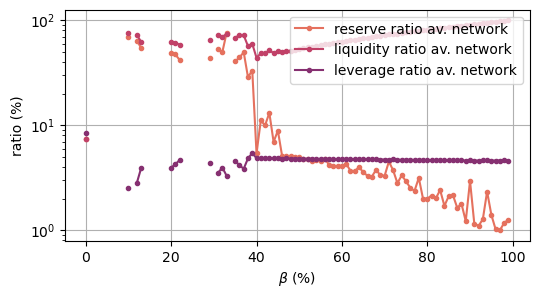

In [4]:
fig, ax = plt.subplots(figsize=par.large_figsize)


input_parameter = "beta_reg"
metric = "accounting_view/regulatory_ratios"

opt_granular =False

cols=[f"{item}{par.df_figures.loc[metric,'extension']}" for item in par.df_figures.loc[metric, "items"]]
# cols = cols[:-2]
colors = sns.color_palette("flare", n_colors=len(cols))
path = "./results/article_plots/parameter_space/"
os.makedirs(f"{path}{metric}/",exist_ok=True)
file_name=f"{path}{metric}/{input_parameter}.pdf"




# filter on index
if not(opt_granular):
    df = df_network_sensitivity.loc[input_parameter].groupby(level=0).apply(lambda group: group.apply(fct.filtered_mean, axis=0))
else:
    df = df_network_sensitivity.loc[input_parameter].copy()

# convert the cols of the df using the convertion of first col
df = gx.convert_data(df[cols], par.df_plt.loc[cols[0], "convertion"])

# convert the index
if not(opt_granular):
    df = gx.convert_index(
        df,
        par.df_plt.loc[input_parameter, "convertion"],
    )

# sort index
df.sort_index(inplace=True)


# filter on columns
for i, col in enumerate(cols):
    if opt_granular:
        plt.plot(df.index.get_level_values(0)*100, df[col], ".", color=colors[i])
    else:
        plt.plot(df.index, df[col], ".-", color=colors[i])

# set legend
lgd = plt.legend(
    par.df_plt.loc[cols, "legend"],
    loc="upper right",
    # bbox_to_anchor=(-0.18, 1.35),
    # ncols=2
)

plt.xlabel(par.df_plt.loc[input_parameter, "label"])
plt.ylabel(par.df_plt.loc[cols[0], "label"])
plt.xscale(par.df_plt.loc[input_parameter, "scale"])
plt.yscale("log")
plt.grid()
plt.savefig(
    f"{file_name}",
    bbox_inches="tight",
    bbox_extra_artists=(lgd,),
)

In [12]:
df_network_sensitivity.loc[input_parameter].loc[0.8]["reserve ratio av. network"]

4980    3.939691
4080    1.764024
7780         NaN
4380    2.813690
7280    2.027588
          ...   
6480    1.992023
180     1.796382
5580    1.821429
1680    1.721535
6880    2.238023
Name: reserve ratio av. network, Length: 79, dtype: float64

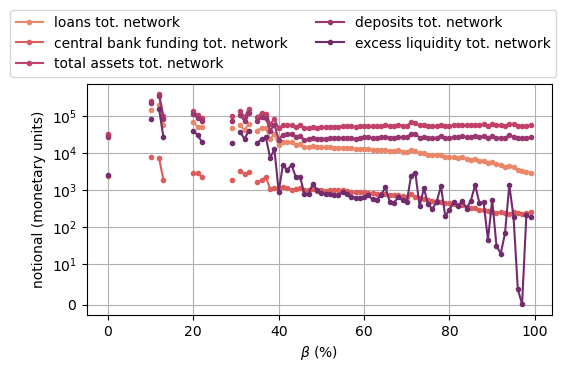

In [8]:
fig, ax = plt.subplots(figsize=par.large_figsize)


input_parameter = "beta_reg"
metric = "accounting_view/macro_economic_aggregates"
cols=[f"{item}{par.df_figures.loc[metric,'extension']}" for item in par.df_figures.loc[metric, "items"]]
cols = cols[:-1]
colors = sns.color_palette("flare", n_colors=len(cols))
path = "./results/article_plots/parameter_space/"
os.makedirs(f"{path}{metric}/",exist_ok=True)
file_name=f"{path}{metric}/{input_parameter}.pdf"

# filter on index
df = df_network_sensitivity.loc[input_parameter].groupby(level=0).apply(lambda group: group.apply(fct.filtered_mean, axis=0))

# convert the cols of the df using the convertion of first col
df = gx.convert_data(df[cols], par.df_plt.loc[cols[0], "convertion"])

# convert the index
df = gx.convert_index(
    df,
    par.df_plt.loc[input_parameter, "convertion"],
)

# sort index
df.sort_index(inplace=True)


# filter on columns
for i, col in enumerate(cols):
    plt.plot(df.index, df[col], ".-", color=colors[i])

# set legend
lgd = plt.legend(
    par.df_plt.loc[cols, "legend"],
    loc="upper left",
    bbox_to_anchor=(-0.18, 1.35),
    ncols=2
)

plt.xlabel(par.df_plt.loc[input_parameter, "label"])
plt.ylabel(par.df_plt.loc[cols[0], "label"])
plt.xscale(par.df_plt.loc[input_parameter, "scale"])
if par.df_plt.loc[cols[0], "scale"] == "symlog":
    plt.yscale(par.df_plt.loc[cols[0], "scale"],linthresh=1e-10)
else:
    plt.yscale("log")
plt.yscale("symlog",linthresh=10)
plt.grid()
plt.savefig(
    f"{file_name}",
    bbox_inches="tight",
    bbox_extra_artists=(lgd,),
)

In [21]:
df = df_network_sensitivity.loc[input_parameter].groupby(level=0).quantile(0.5)

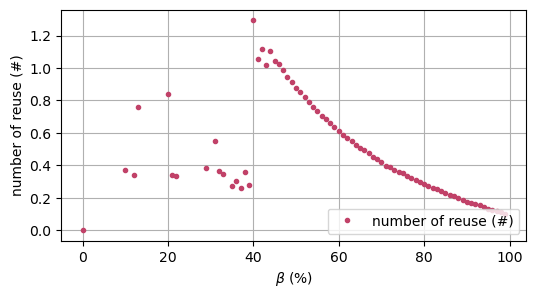

In [7]:
fig, ax = plt.subplots(figsize=par.large_figsize)


opt_granular =False

input_parameter = "beta_reg"
metric = "accounting_view/collateral_reuse"
cols=[f"{item}{par.df_figures.loc[metric,'extension']}" for item in par.df_figures.loc[metric, "items"]]
# cols = cols[:-2]
colors = sns.color_palette("flare", n_colors=len(cols))
path = "./results/article_plots/parameter_space/"
os.makedirs(f"{path}{metric}/",exist_ok=True)
file_name=f"{path}{metric}/{input_parameter}.pdf"

# filter on index
if not(opt_granular):
    df = df_network_sensitivity.loc[input_parameter].groupby(level=0).apply(lambda group: group.apply(fct.filtered_mean, axis=0))
else:
    df = df_network_sensitivity.loc[input_parameter].copy()

# convert the cols of the df using the convertion of first col
df = gx.convert_data(df[cols], par.df_plt.loc[cols[0], "convertion"])

# convert the index
if not(opt_granular):
    df = gx.convert_index(
        df,
        par.df_plt.loc[input_parameter, "convertion"],
    )

# sort index
df.sort_index(inplace=True)


# filter on columns
for i, col in enumerate(cols):
    if opt_granular:
        plt.plot(df.index.get_level_values(0)*100, df[col], ".", color=colors[i])
    else:
        plt.plot(df.index, df[col], ".", color=colors[i])

# set legend
lgd = plt.legend(
    par.df_plt.loc[cols, "legend"],
    loc="lower right",
    # bbox_to_anchor=(-0.18, 1.35),
    # ncols=2
)

plt.xlabel(par.df_plt.loc[input_parameter, "label"])
plt.ylabel(par.df_plt.loc[cols[0], "label"])
plt.xscale(par.df_plt.loc[input_parameter, "scale"])
plt.grid()
plt.savefig(
    f"{file_name}",
    bbox_inches="tight",
    bbox_extra_artists=(lgd,),
)

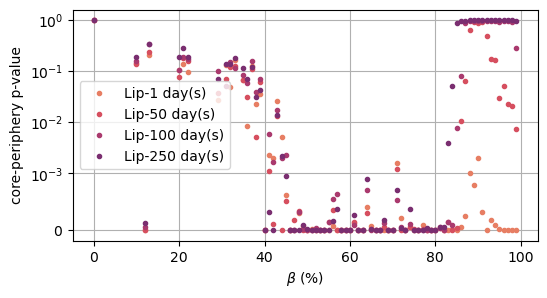

In [5]:
fig, ax = plt.subplots(figsize=par.large_figsize)


input_parameter = "beta_reg"
metric = "exposure_view/core-periphery/cpnet_pvalue-Lip"
cols=[f"{item}{par.df_figures.loc[metric,'extension']}" for item in par.df_figures.loc[metric, "items"]]
cols = cols[:-1]
colors = sns.color_palette("flare", n_colors=len(cols))
path = "./results/article_plots/parameter_space/"
os.makedirs(f"{path}{metric}/",exist_ok=True)
file_name=f"{path}{metric}/{input_parameter}.pdf"

# filter on index
df = df_network_sensitivity.loc[input_parameter].groupby(level=0).apply(lambda group: group.apply(fct.filtered_mean, axis=0))

# convert the cols of the df using the convertion of first col
df = gx.convert_data(df[cols], par.df_plt.loc[cols[0], "convertion"])

# convert the index
df = gx.convert_index(
    df,
    par.df_plt.loc[input_parameter, "convertion"],
)

# sort index
df.sort_index(inplace=True)


# filter on columns
for i, col in enumerate(cols):
    plt.plot(df.index, df[col], ".", color=colors[i])

# set legend
lgd = plt.legend(
    par.df_plt.loc[cols, "legend"],
    # loc="upper left",
    # bbox_to_anchor=(-0.18, 1.1),
    # ncols=4
)

plt.xlabel(par.df_plt.loc[input_parameter, "label"])
plt.ylabel(par.df_plt.loc[cols[0], "label"])
plt.xscale(par.df_plt.loc[input_parameter, "scale"])
if par.df_plt.loc[cols[0], "scale"] == "symlog":
    plt.yscale(par.df_plt.loc[cols[0], "scale"],linthresh=1e-10)
else:
    plt.yscale("log")
plt.yscale("symlog",linthresh=1e-3)
plt.grid()
plt.savefig(
    f"{file_name}",
    bbox_inches="tight",
    bbox_extra_artists=(lgd,),
)

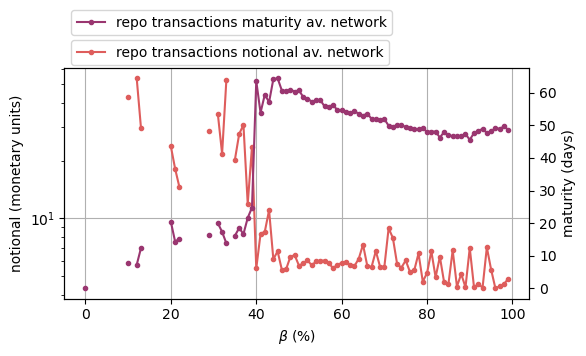

In [6]:
fig, ax = plt.subplots(figsize=par.large_figsize)


input_parameter = "beta_reg"
metric = "transaction_view/transactions"
cols=["repo transactions notional av. network",
      "repo transactions maturity av. network",
            ]

colors = sns.color_palette("flare", n_colors=len(cols))
path = "./results/article_plots/parameter_space/"
os.makedirs(f"{path}{metric}/",exist_ok=True)
file_name=f"{path}{metric}/{input_parameter}.pdf"

# filter on index
df = df_network_sensitivity.loc[input_parameter].groupby(level=0).apply(lambda group: group.apply(fct.filtered_mean, axis=0))

# convert the cols of the df using the convertion of first col
df = gx.convert_data(df[cols], par.df_plt.loc[cols[0], "convertion"])

# convert the index
df = gx.convert_index(
    df,
    par.df_plt.loc[input_parameter, "convertion"],
)

# sort index
df.sort_index(inplace=True)


# filter on columns
ax.plot(
    df.index,
    df[cols[0]],
    ".-",
    color=colors[0],
)
ax.set_ylabel(par.df_plt.loc[cols[0], "label"])
ax.set_yscale("log")
ax2 = ax.twinx()

ax2.plot(
    df.index,
    df[cols[1]],
    ".-",
    color=colors[1],
)
ax2.set_ylabel(par.df_plt.loc[cols[1], "label"])

# set legend
ax.legend(
    [par.df_plt.loc[cols[0], "legend"]],
    loc="upper left",
    
    bbox_to_anchor=(0, 1.15),
)
ax2.legend(
    [par.df_plt.loc[cols[1], "legend"]],
    loc="upper left",
    bbox_to_anchor=(0, 1.28),
)

ax.set_xlabel(par.df_plt.loc[input_parameter, "label"])
ax.set_xscale(par.df_plt.loc[input_parameter, "scale"])

ax.grid()
plt.savefig(
    f"{file_name}",
    bbox_inches="tight",
    # bbox_extra_artists=(lgd,),
)